                            SPEAKER RECOGNITION

   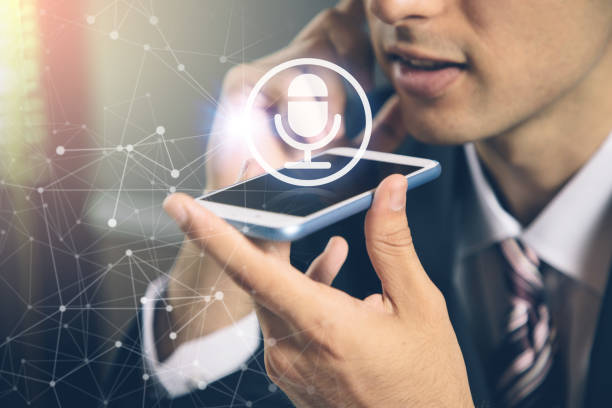


Problem Statement: In this project, we have 3 3 second wav files for each of the speakers. We will try to train a RNN(Recurrent Neural Network) model to predict if our model captures the speaker properly. There are also background noise files on separate folders if we want to use them and generalize our model further. I will implement without using the background noise files. Recurrent Neural Networks (RNNs) are well-suited for certain aspects of speaker recognition due to their ability to model sequential dependencies and capture temporal patterns in data. 

## IMPORTING LIBRARIES

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

I want to combine the audio files for each speaker and listen to few samples, I am using the combined_wav_RNN folder to combine the files.

In [82]:
# Output directory to clear
output_dir = "E:\\my python\\my_voice_authentication\\combined_wav_RNN"

# Clear the contents of the output directory
shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)

print(f"Contents of {output_dir} cleared.")


Contents of E:\my python\my_voice_authentication\combined_wav_RNN cleared.


## Create combined files for each speaker 

Using librosa and soundfile packages to create the combined files.I am taking the 3 files from each speaker folder to create 9 sec long snippets of each speech.

librosa is a Python package for music and audio analysis. It provides tools to analyze and visualize audio data, including functions for feature extraction, time-series representation, and visualization of audio signals. It is commonly used in the field of music information retrieval and audio signal processing.

soundfile is a Python library for reading and writing sound files. It provides an easy-to-use interface for working with audio files, supporting various formats such as WAV, FLAC, and OGG. soundfile is often used in conjunction with librosa when working with audio data, as it helps to load and save audio files efficiently.

In [71]:
import librosa
import soundfile as sf
import csv

# with open("userLists.csv", "r") as csvfile:
#     # Do something with the CSV data here
#  reader = csv.reader(csvfile)
#  data = list(reader)
#  data = []
#  for row in reader:
#     data.append(row)

# Path to the dataset
dataset_path = "E:\\my python\\my_voice_authentication\\voice_database"

# Output directory to save the combined files
output_dir = "E:\\my python\\my_voice_authentication\\combined_wav_RNN"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# List of speaker folders
# with open("E:\\my python\\my_voice_authentication\\user_database\\userLists.csv", "r") as csvfile:
#     # Do something with the CSV data here
#  reader = csv.reader(csvfile)
#  speaker_folders = list(reader)
#  speaker_folders = []
#  for row in reader:
#     for j in range(len(row)):
#        row[j] = row[j].replace("\n", "") 
#     speaker_folders.append(row)

speaker_folders =  [
  #  "benjamin",
    "ishwarya",
    "srikanya",
    "nikhil",
    "chutiya",
    "bhargav",
    "katam",
    "mounika",
    "navya",
    "lahari"
    #"Nelson_Mandela"
 ]

# Number of files to combine for each speaker
num_files_to_combine = 3

# Iterate over each speaker's folder
for speaker_folder in speaker_folders:
    speaker_folder_path = os.path.join(dataset_path, speaker_folder)

    # List the first num_files_to_combine WAV files in the speaker's folder
    wav_files = [f"{i}.wav" for i in range(1,num_files_to_combine)]

    # Combine all WAV files into a single long file
    combined_audio = []
    for wav_file in wav_files:
        wav_file_path = os.path.join(speaker_folder_path, wav_file)
        audio, sr = librosa.load(wav_file_path, sr=None)
        combined_audio.extend(audio)

    # Save the combined audio file
    output_file_path = os.path.join(output_dir, f"{speaker_folder}_combined.wav")
    sf.write(output_file_path, combined_audio, sr)

print("Combination complete. Combined files saved in:", output_dir)
print(speaker_folders)

Combination complete. Combined files saved in: E:\my python\my_voice_authentication\combined_wav_RNN
['ishwarya', 'srikanya', 'nikhil', 'chutiya', 'bhargav', 'katam', 'mounika', 'navya', 'lahari']


IPython is an interactive command-line shell for Python. It provides an enhanced interactive environment for Python programming and is particularly popular among data scientists, researchers, and engineers working in scientific computing, data analysis, and machine learning.

In [72]:
from IPython.display import display, Audio

# Function to play audio file
def play_audio(audio_path):
    display(Audio(filename=audio_path))

# Play a specific combined audio file
speaker_folder = "ishwarya_combined"
audio_path = os.path.join(output_dir, f"{speaker_folder}.wav")
print(f"Click the play button to listen: {audio_path}")
play_audio(audio_path)


Click the play button to listen: E:\my python\my_voice_authentication\combined_wav_RNN\ishwarya_combined.wav


In [73]:
# Function to play audio file
def play_audio(audio_path):
    display(Audio(filename=audio_path))

# Play a specific combined audio file
speaker_folder = "srikanya_combined"
audio_path = os.path.join(output_dir, f"{speaker_folder}.wav")
print(f"Click the play button to listen: {audio_path}")
play_audio(audio_path)

Click the play button to listen: E:\my python\my_voice_authentication\combined_wav_RNN\srikanya_combined.wav


## DATA VISUALIZATIONS

A waveform and spectrogram are two types of visual representations of audio signals:

1. **Waveform:**
   - **Representation:** A waveform is a time-domain representation of an audio signal.
   - **Axis:** The x-axis represents time, and the y-axis represents the amplitude (loudness) of the signal at each point in time.
   - **Features:** It shows how the amplitude of the audio signal changes over time.
   - **Interpretation:** Peaks and valleys in the waveform correspond to changes in air pressure, which are perceived as sound.

2. **Spectrogram:**
   - **Representation:** A spectrogram is a frequency-domain representation of an audio signal.
   - **Axis:** The x-axis represents time, the y-axis represents frequency, and the color/intensity represents the magnitude (energy) of frequencies at different times.
   - **Features:** It provides a 2D representation of how the frequency content of the signal changes over time.
   - **Interpretation:** Dark regions in the spectrogram indicate the presence of certain frequencies at specific times.

The Mel-Frequency Cepstral Coefficients (MFCCs) plot is a representation of the audio signal in the frequency domain. MFCCs are coefficients that collectively represent the short-term power spectrum of a sound signal. The plot visualizes the variations in the spectral content of the audio signal over time.

Here's what the MFCC plot can show:

1. **Time vs. Frequency:** The x-axis represents time, and the y-axis represents different frequency bands. Each column in the plot corresponds to a short segment of time, and the height of the plot at a particular frequency band represents the magnitude or intensity of the signal in that frequency range during that time segment.

2. **Feature Extraction:** MFCCs are used as features for audio processing tasks. Each row in the plot corresponds to one of the MFCC coefficients. These coefficients capture important characteristics of the audio signal, such as the shape of the vocal tract, which is useful for tasks like speech and audio recognition.

3. **Spectral Characteristics:** Peaks and patterns in the plot can indicate specific frequencies or patterns in the audio signal. For example, formants in speech can be identified as concentrations of energy at specific frequencies.

4. **Analysis of Sound Patterns:** By observing how the MFCCs change over time, you can analyze sound patterns, distinguish between different sounds, and extract features for use in machine learning models for tasks like speaker identification, emotion recognition, or speech-to-text.

We will look at some plots for few speakers

C:\Users\Nikhil Kumar\AppData\Local\Temp\ipykernel_8844\990622681.py:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


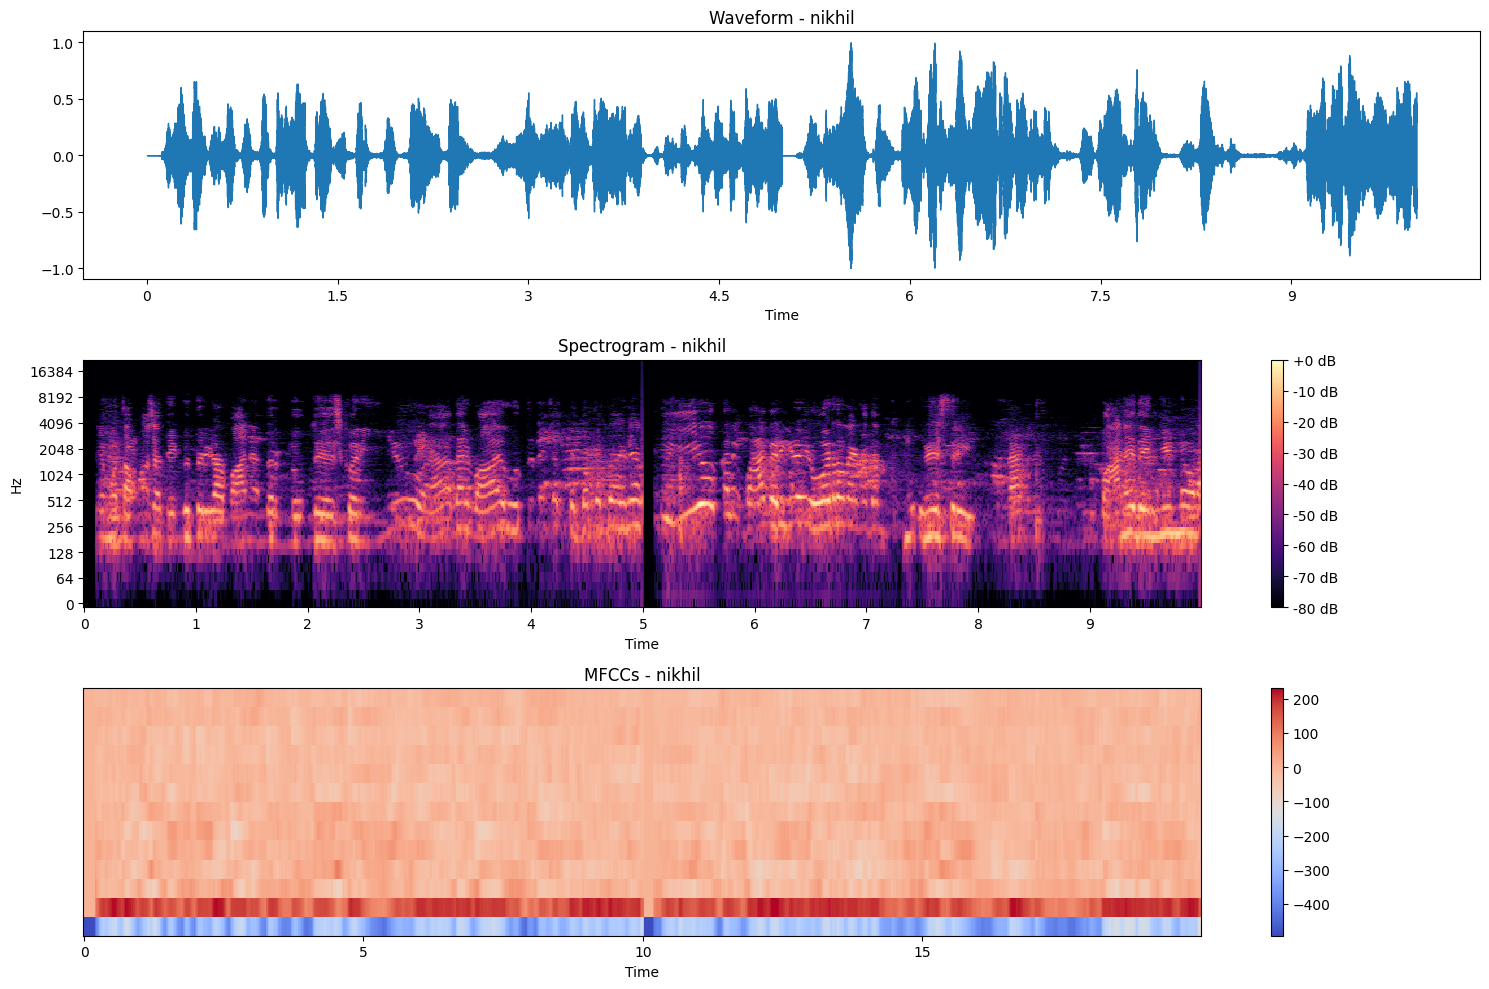

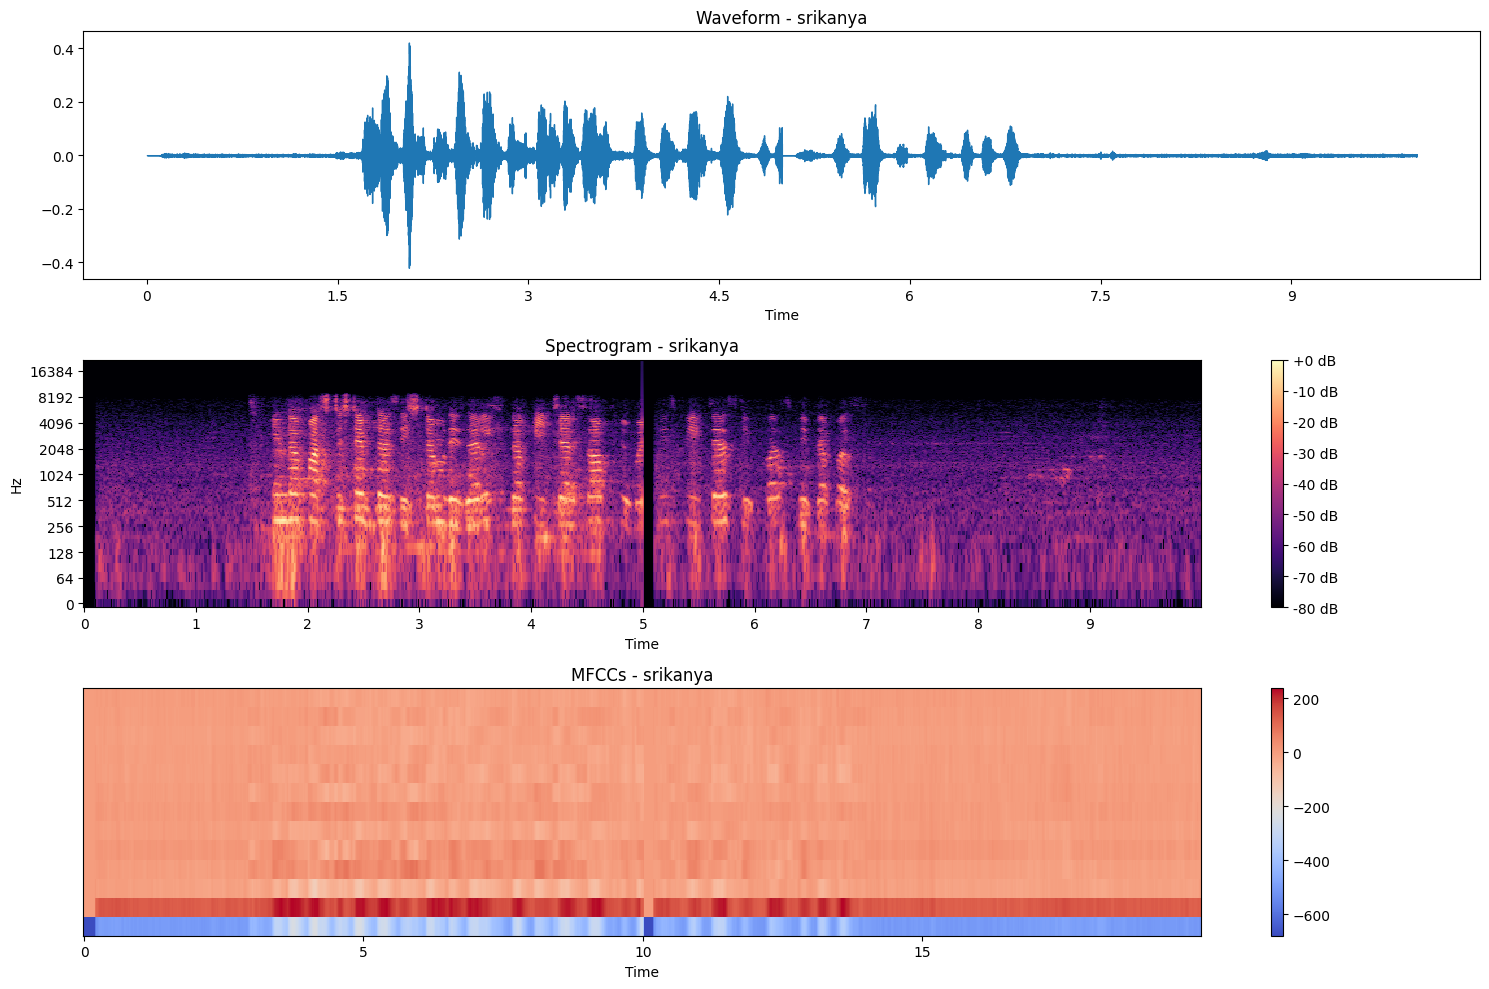

In [74]:
import librosa.display

# Function to plot the waveform, spectrogram, and MFCCs
def plot_audio_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Extract speaker name from the file path
    speaker_name = os.path.basename(audio_path).split('_')[0]

    # Plot the waveform
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {speaker_name}')

    # Plot the spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker_name}')

    # Plot the MFCCs
    plt.subplot(3, 1, 3)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker_name}')

    plt.tight_layout()
    plt.show()

# Paths to the combined audio files
audio_paths = [
    "E:\\my python\\my_voice_authentication\\combined_wav_RNN\\nikhil_combined.wav",
    "E:\\my python\\my_voice_authentication\\combined_wav_RNN\\srikanya_combined.wav"
]

# Plot features for each audio file
for audio_path in audio_paths:
    plot_audio_features(audio_path)


## FEATURE EXTRACTION

Feature extraction is a crucial step in the process of preparing data for machine learning tasks, and its importance lies in several key aspects:

1. **Dimensionality Reduction:** Raw data, especially in audio, image, or text processing, can be high-dimensional. Extracting relevant features helps reduce the dimensionality of the data, making it more manageable and computationally efficient.

2. **Relevant Information Capture:** Feature extraction allows the capture and representation of essential information within the data. Not all raw data is equally informative, and feature extraction helps identify and retain the most relevant aspects for the given task.

3. **Noise Reduction:** By focusing on specific features, the extraction process can help filter out noise or irrelevant details present in the raw data. This can lead to more robust and accurate machine learning models.

4. **Improved Model Performance:** Feature extraction often contributes to improved model performance. Models can better generalize and make predictions when trained on a set of well-defined, informative features.

5. **Facilitation of Learning:** Extracted features can highlight patterns, relationships, or structures in the data that are more conducive to learning. This can lead to faster and more effective training of machine learning models.

6. **Human Interpretability:** In some cases, extracted features are more interpretable and meaningful to humans than the raw data. This interpretability can be crucial for understanding the inner workings of a model and building trust in its predictions.

7. **Domain-Specific Adaptation:** Feature extraction allows the tailoring of data representation to the specific requirements and characteristics of the problem domain. Different tasks may require different sets of features for optimal performance.

8. **Handling of Multimodal Data:** In scenarios where data comes from multiple sources or modalities, feature extraction enables the integration of information from different domains into a common representation, facilitating joint analysis.

In [75]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Set the parent directory for speaker folders
parent_dir = "E:\\my python\\my_voice_authentication\\voice_database"

# List of speaker folders

# with open("E:\\my python\\my_voice_authentication\\user_database\\userLists.csv", "r") as csvfile:
#     # Do something with the CSV data here
#  reader = csv.reader(csvfile)
#  speaker_folders = list(reader)
#  speaker_folders = []
#  for row in reader:
#     # for j in range(len(row)):
#     #    row[j] = row[j].replace("\n", "") 
#     speaker_folders.append(row)

speaker_folders =  [
  #  "benjamin",
    "ishwarya",
    "srikanya",
    "nikhil",
    "chutiya",
    "bhargav",
    "katam",
    "mounika",
    "navya",
    "lahari"
    #"Nelson_Mandela"
 ]

def extract_features(parent_dir, speaker_folders):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None, duration=1)
                mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                
                # Normalize MFCC features
                mfccs = StandardScaler().fit_transform(mfccs)
                
                features.append(mfccs.T)
                labels.append(i)

    return np.array(features), np.array(labels)

# Extract features and labels
X, y = extract_features(parent_dir, speaker_folders)


In [76]:
# Print the first few features
for feature in X[:1]:
    print(feature)

[[-3.4641018   0.28867513  0.28867513 ...  0.28867513  0.28867513
   0.28867513]
 [-3.4641018   0.28867513  0.28867513 ...  0.28867513  0.28867513
   0.28867513]
 [-3.4641018   0.28867513  0.28867513 ...  0.28867513  0.28867513
   0.28867513]
 ...
 [-3.1149237   1.6448336  -0.3993576  ...  0.03041136  0.20925583
   0.17677754]
 [-3.2085013   1.4882253  -0.23538102 ...  0.0446077   0.18279356
   0.17962147]
 [-3.304615    1.2753063  -0.01451667 ...  0.11759701  0.20327012
   0.21220881]]


In [77]:
print(tf.config.list_physical_devices('GPU'))

[]


## MODEL SET UP - TRAIN/TEST SPLIT and EVALUATION

Splitting the data into 70% train and the remaining will be split equally into validation and test datasets.

In [78]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Encode labels with explicit classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_ = np.array(speaker_folders)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of training and validation data
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (18, 87, 13)
Validation Data Shape: (4, 87, 13)


## TRAINING

In the context of setting up neural network layers, the numbers 128 and 64 refer to the number of neurons or units in those particular layers. 

tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])): This is an LSTM (Long Short-Term Memory) layer with 128 units. The LSTM layer is a type of recurrent neural network (RNN) layer that is particularly effective for sequence data.

tf.keras.layers.Dense(64, activation='relu'): This is a dense (fully connected) layer with 64 units and ReLU (Rectified Linear Unit) activation function. Dense layers are used for fully connecting every neuron in one layer to every neuron in the next layer.

tf.keras.layers.Dense(len(speaker_folders), activation='softmax'): This is the output layer with as many units as there are classes (determined by len(speaker_folders)). The softmax activation function is often used in the output layer for multi-class classification problems, as it converts raw scores into probabilities.

These choices (128, 64) are somewhat arbitrary and can be adjusted based on the specific characteristics of your data and the complexity of the problem. The number of units in a layer is a hyperparameter that you can experiment with during model tuning. More complex problems or data may require more units, but this also increases the model's capacity and may lead to overfitting if not balanced.

We are also using early stopping to avoid extra runtime and overfitting on the training dataset. Running for 20 Epochs with adam optimizer for compilation.

Epoch 1/20


e:\my python\my_voice_authentication\voice\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1111 - loss: 2.1777 - val_accuracy: 0.0000e+00 - val_loss: 2.2841
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1667 - loss: 2.1205 - val_accuracy: 0.0000e+00 - val_loss: 2.3882
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.1667 - loss: 2.0888 - val_accuracy: 0.0000e+00 - val_loss: 2.4543
Early stopping triggered at epoch 3


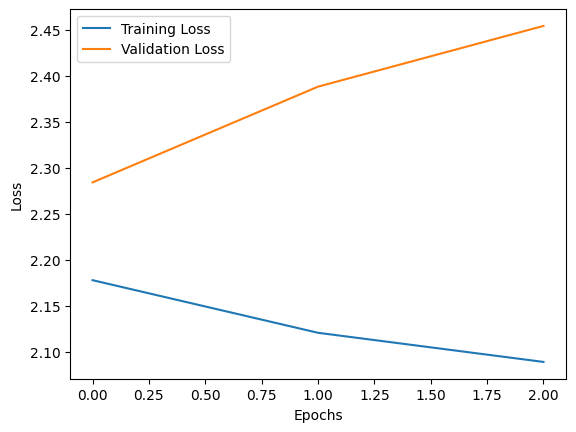

In [79]:
# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(speaker_folders), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# Check if EarlyStopping triggered
if early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training completed without early stopping")

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## EVALUATION

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Test Evaluation Accuracy: 0.0
Weighted F1 Score: 0.0


e:\my python\my_voice_authentication\voice\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


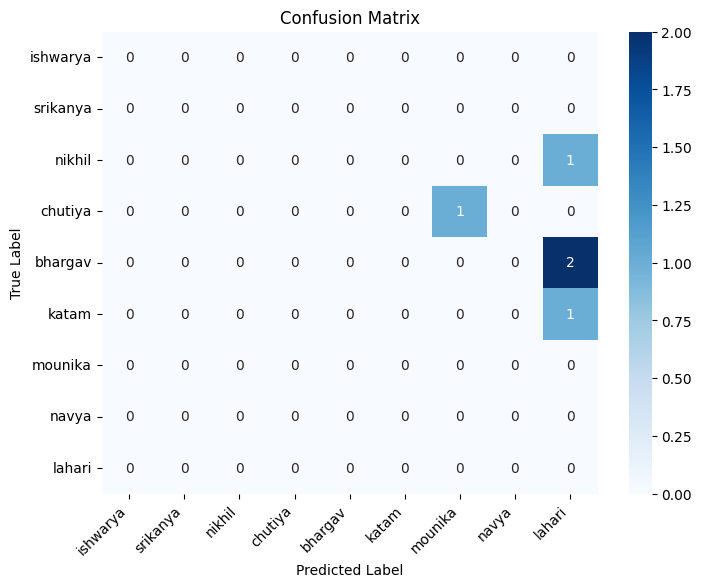

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode labels back to original format
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=speaker_folders)

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test_decoded, y_pred_decoded, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

We didn't use the background noise here but below you can see some notes on setting up models using background noise for better generalization.